# Classifier model demo 

In [1]:
from PIL import Image
import numpy as np

In [2]:
from keras.models import load_model

Using TensorFlow backend.


In [28]:
#load the pre-trained model
model = load_model('Manga_face_model_2.h5')

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 146, 146, 16)      4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               401536    
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
__________

In [4]:
#function to convert and reshape the demo images
def image_to_input_array(image_path):
    img=Image.open(image_path)
    img= img.convert('L')
    img=img.resize((150,150), Image.ANTIALIAS)
    img=np.array(img, dtype="uint8")
    input_array = np.asarray(img).reshape(1,150,150,1)
    return input_array

In [5]:
#function to give the manga name for the given image from the input path
def input_class(image_path):
    X=image_to_input_array(image_path)
    prediction = model.predict(X)
    result = np.where(prediction == np.amax(prediction))
    if result[1][0]== 0:
        return 'Nekodama'
    else:
        if result[1][0]== 1:
            return 'MiraiSan'
        else:
            return 'RisingGirl'

### Demos:
The demo images are saved in folder 'demo'.

You could also crop some faces from the 'simple model' folder and test.

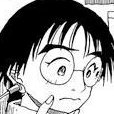

In [40]:
image_path ='demo/demo.jpg'
Image.open(image_path)


In [41]:
print("The character belongs to manga: "+str(input_class(image_path)))

The character belongs to manga: MiraiSan


In [42]:
image_path ='demo/011.jpg'

In [43]:
print("The character belongs to manga: "+str(input_class(image_path)))

The character belongs to manga: Nekodama


In [46]:
image_path ='demo/demo_068.jpg'
print("The character belongs to manga: "+str(input_class(image_path)))

The character belongs to manga: RisingGirl
